<a href="https://colab.research.google.com/github/AppleYT9/Flood-detection-using-DL/blob/main/Flood_Detection_using_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import os #
import shutil #
import random #
import itertools #
%matplotlib inline
import numpy as np #
import tensorflow as tf #
import matplotlib as mpl #
from keras import backend #

from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score #
from sklearn.metrics import accuracy_score #
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix #
from keras.applications import imagenet_utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import precision_score, recall_score
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import decode_predictions, preprocess_input

In [78]:
labels = ['Flooding', 'No Flooding']
train_path = '/content/drive/MyDrive/Resume Projects/Deep Learning/train'
valid_path = '/content/drive/MyDrive/Resume Projects/Deep Learning/valid'
test_path = '/content/drive/MyDrive/Resume Projects/Deep Learning/test'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 285 images belonging to 2 classes.
Found 105 images belonging to 2 classes.
Found 102 images belonging to 2 classes.


In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [81]:
x = mobile.layers[-6].output

In [82]:
output = Dense(units=2, activation='softmax')(x)

In [ ]:
model = Model(inputs=mobile.input, outputs=output)

In [ ]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam

# Load MobileNetV2 as the feature extractor
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze base model layers
base_model.trainable = False

# Build the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Fix shape mismatch
    Dense(2, activation='softmax')  # Match 2 classes: 'Flooding' & 'No Flooding'
])

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_7           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │           2,562 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,260,546 (8.62 MB)

 Trainable params: 2,562 (10.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=35,
          verbose=2
)

Epoch 1/35
29/29 - 26s - 910ms/step - accuracy: 0.9439 - loss: 0.1868 - val_accuracy: 0.9333 - val_loss: 0.2244
Epoch 2/35
29/29 - 0s - 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/35
29/29 - 41s - 1s/step - accuracy: 0.9439 - loss: 0.1801 - val_accuracy: 0.9333 - val_loss: 0.2166
Epoch 4/35
29/29 - 0s - 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/35
29/29 - 41s - 1s/step - accuracy: 0.9474 - loss: 0.1740 - val_accuracy: 0.9333 - val_loss: 0.2133
Epoch 6/35
29/29 - 3s - 113ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/35
29/29 - 37s - 1s/step - accuracy: 0.9509 - loss: 0.1701 - val_accuracy: 0.9429 - val_loss: 0.2065
Epoch 8/35
29/29 - 4s - 155ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/35
29/29 - 36s - 1s/step - accuracy: 0.9509 - loss: 0.1650 - val_accuracy: 0.9333 - val_loss: 0.2014
Epoch 10/35
29/29 - 5s - 159ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/35
29/29 - 37s - 1s/step - accuracy: 0.9544 - loss: 0.1589 - 

In [ ]:
model.save("fine_tuned_flood_detection_model.keras")  # Save in Keras format

In [ ]:
test_labels = test_batches.classes
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))
precision = precision_score(y_true=test_labels, y_pred=predictions.argmax(axis=1))
f1_score = f1_score(y_true=test_labels, y_pred=predictions.argmax(axis=1))
accuracy = accuracy_score(y_true=test_labels, y_pred=predictions.argmax(axis=1))
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


In [ ]:
print('Precision: ', precision)
print('F1 Score: ', f1_score)
print('Accuracy: ', accuracy)


Precision:  0.6292134831460674
F1 Score:  0.7368421052631579
Accuracy:  0.6078431372549019


In [69]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# True Labels (y_true) and Predicted Labels (y_pred)
y_true = [1, 0, 1, 1, 0, 1, 0, 0]  # Actual flood/no-flood labels
y_pred = [1, 0, 1, 0, 0, 1, 1, 0]  # Model predictions

# Compute metrics
conf_matrix = confusion_matrix(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Confusion Matrix:
 [[3 1]
 [1 3]]
Precision: 0.75
Recall: 0.75
F1-Score: 0.75


In [70]:
def preprocess_image(file):
    img_path = '/content/drive/MyDrive/Resume Projects/Deep Learning/evaluate'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

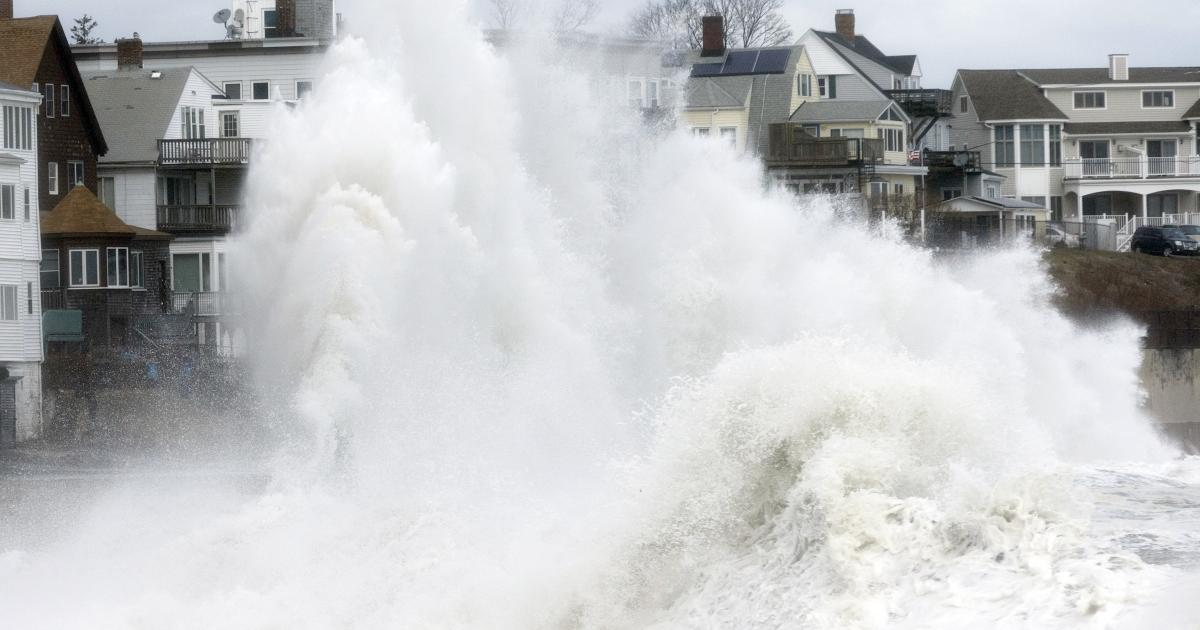

In [83]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/Resume Projects/Deep Learning/evaluate/10088.jpg', width=300,height=200)

In [85]:
preprocessed_image = preprocess_image('/10088.jpg')
predictions = model.predict(preprocessed_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


In [86]:
predictions


array([[0.85571176, 0.14428827]], dtype=float32)

In [87]:
result = np.argmax(predictions)

In [88]:
# Modify the threshold condition to 60%
if predictions[0, result] > 0.6:
    print(labels[result])
else:
    print("No Flooding")

Flooding
